# Linear Regression with python
Predictive analysis using supervised machine learning

### Import the libraries

In [180]:
import warnings
warnings.simplefilter('ignore')

### Import numpy and pandas

In [181]:
import numpy as np
import pandas as pd

### Import Data visualisation library

In [182]:
#import data visulaisation library
import matplotlib.pyplot as plt
%matplotlib inline

### Import the dataset

In [183]:

dataset=pd.read_csv(r'C:\Users\Srilaptop\OneDrive\VAC Dataset\Real estate.csv')
dataset

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


### Understanding the dataset

In [184]:
dataset.shape

(414, 8)

In [185]:
dataset.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [186]:
print(dataset.isnull().sum())

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


In [187]:
dataset.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

### Slicing the dataset

In [188]:
dataset=dataset.drop(['No', 'X1 transaction date','X3 distance to the nearest MRT station','X4 number of convenience stores', 'X5 latitude', 'X6 longitude'],axis=1,errors='ignore')#errors='ignore' is given to ignore the key error:LOR not found in axis

In [189]:
dataset

,X2 house age,Y house price of unit area
0,32.0,37.9
1,19.5,42.2
2,13.3,47.3
3,13.3,54.8
4,5.0,43.1
...,...,...
409,13.7,15.4
410,5.6,50.0
411,18.8,40.6
412,8.1,52.5


### Segregate and shape the variables

In [190]:
x=dataset.iloc[:,0] #here x is house age

In [191]:
x

0      32.0
1      19.5
2      13.3
3      13.3
4       5.0
       ... 
409    13.7
410     5.6
411    18.8
412     8.1
413     6.5
Name: X2 house age, Length: 414, dtype: float64

In [192]:
x.shape

(414,)

In [194]:
x=dataset.iloc[:,0].values.reshape(-1,1)#reshaping the data, so that it can be in a dataframe

In [195]:
x.shape

(414, 1)

In [196]:
x

array([[32. ],
       [19.5],
       [13.3],
       [13.3],
       [ 5. ],
       [ 7.1],
       [34.5],
       [20.3],
       [31.7],
       [17.9],
       [34.8],
       [ 6.3],
       [13. ],
       [20.4],
       [13.2],
       [35.7],
       [ 0. ],
       [17.7],
       [16.9],
       [ 1.5],
       [ 4.5],
       [10.5],
       [14.7],
       [10.1],
       [39.6],
       [29.3],
       [ 3.1],
       [10.4],
       [19.2],
       [ 7.1],
       [25.9],
       [29.6],
       [37.9],
       [16.5],
       [15.4],
       [13.9],
       [14.7],
       [12. ],
       [ 3.1],
       [16.2],
       [13.6],
       [16.8],
       [36.1],
       [34.4],
       [ 2.7],
       [36.6],
       [21.7],
       [35.9],
       [24.2],
       [29.4],
       [21.7],
       [31.3],
       [32.1],
       [13.3],
       [16.1],
       [31.7],
       [33.6],
       [ 3.5],
       [30.3],
       [13.3],
       [11. ],
       [ 5.3],
       [17.2],
       [ 2.6],
       [17.5],
       [40.1],
       [ 1

In [197]:
y=dataset.iloc[:,-1].values.reshape(-1,1) #here y is house price of unit area 

In [198]:
y.shape

(414, 1)

In [199]:
y

array([[ 37.9],
       [ 42.2],
       [ 47.3],
       [ 54.8],
       [ 43.1],
       [ 32.1],
       [ 40.3],
       [ 46.7],
       [ 18.8],
       [ 22.1],
       [ 41.4],
       [ 58.1],
       [ 39.3],
       [ 23.8],
       [ 34.3],
       [ 50.5],
       [ 70.1],
       [ 37.4],
       [ 42.3],
       [ 47.7],
       [ 29.3],
       [ 51.6],
       [ 24.6],
       [ 47.9],
       [ 38.8],
       [ 27. ],
       [ 56.2],
       [ 33.6],
       [ 47. ],
       [ 57.1],
       [ 22.1],
       [ 25. ],
       [ 34.2],
       [ 49.3],
       [ 55.1],
       [ 27.3],
       [ 22.9],
       [ 25.3],
       [ 47.7],
       [ 46.2],
       [ 15.9],
       [ 18.2],
       [ 34.7],
       [ 34.1],
       [ 53.9],
       [ 38.3],
       [ 42. ],
       [ 61.5],
       [ 13.4],
       [ 13.2],
       [ 44.2],
       [ 20.7],
       [ 27. ],
       [ 38.9],
       [ 51.7],
       [ 13.7],
       [ 41.9],
       [ 53.5],
       [ 22.6],
       [ 42.4],
       [ 21.3],
       [ 63.2],
       [

### Scatter plot

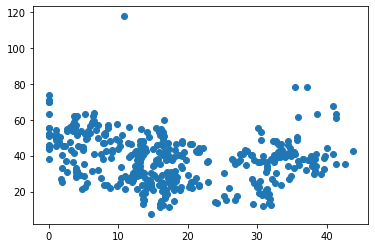

In [200]:
plt.scatter(x,y)
plt.show()

### Divide the dataset into training and test set

In [201]:
from sklearn.model_selection import train_test_split

In [202]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [203]:
x_train.shape

(331, 1)

In [204]:
x_test.shape

(83, 1)

In [205]:
y_train.shape

(331, 1)

In [206]:
y_test.shape

(83, 1)

### Perform the linear regression

In [207]:
from sklearn.linear_model import LinearRegression

In [208]:
lm= LinearRegression()

### Train the model-Linear Regression

In [209]:
lm.fit(x_train,y_train)

LinearRegression()

### Predict the chance of admit

In [210]:
y_pred=lm.predict(x_test)

In [211]:
y_pred

array([[39.88658606],
       [36.17585402],
       [33.33186232],
       [35.74248386],
       [38.77607501],
       [32.76306398],
       [32.97974906],
       [33.25060541],
       [39.83241479],
       [38.01767722],
       [39.074017  ],
       [39.074017  ],
       [39.23653081],
       [33.46729049],
       [41.43046727],
       [32.95266342],
       [33.84648939],
       [42.67640649],
       [39.1552739 ],
       [33.25060541],
       [41.13252528],
       [39.42613026],
       [34.5507159 ],
       [38.31561921],
       [42.10760815],
       [38.6135612 ],
       [37.74682087],
       [34.44237336],
       [41.21378218],
       [39.88658606],
       [41.56589544],
       [37.7739065 ],
       [42.67640649],
       [33.00683469],
       [37.88224904],
       [39.37195899],
       [33.68397558],
       [41.29503909],
       [40.83458329],
       [37.80099214],
       [42.67640649],
       [32.32969381],
       [38.36979048],
       [33.92774629],
       [38.1531054 ],
       [40

### Checking the prediction

In [214]:
check=pd.DataFrame(x_test,columns=['House Age'])

In [215]:
check['Actual House Price of unit area']=y_test

In [216]:
check['Predicted House Price of unit area']=y_pred

In [217]:
check

,House Age,Actual House Price of unit area,Predicted House Price of unit area
0,10.3,45.3,39.886586
1,24.0,14.4,36.175854
2,34.5,46.0,33.331862
3,25.6,15.6,35.742484
4,14.4,50.2,38.776075
...,...,...,...
78,16.4,53.0,38.234362
79,17.5,38.2,37.936420
80,20.3,46.7,37.178023
81,14.7,24.6,38.694818


### Visualize the regressor line

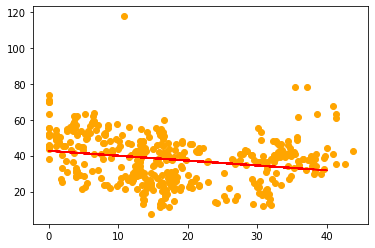

In [218]:
plt.scatter(x,y,color='orange')
plt.plot(x_test,y_pred,color='red')

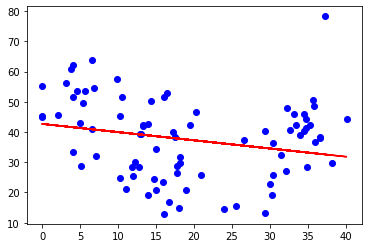

In [219]:
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test,y_pred,color='red')